In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_files
from glob import glob
%matplotlib inline

In [2]:
# Reading the train and test meta-data files
train = pd.read_csv(r'E:\Bhagath\DBeginner\DBeginner\meta-data\meta-data\train.csv')
test = pd.read_csv(r'E:\Bhagath\DBeginner\DBeginner\meta-data\meta-data\test.csv')

In [3]:
# Shape of training and test datasets
print ('Training dataset consists of {} images with {} attributes'.format(train.shape[0], train.shape[1]-1))
# Shape of training and test datasets
print ('Testing dataset consists of {} images.'.format(test.shape[0]))

Training dataset consists of 13000 images with 1 attributes
Testing dataset consists of 6000 images.


In [4]:
train['y'] =[0 if x in ['hippopotamus']
                    else 1 if x in ['squirrel']
                    else 2 if x in ['grizzly+bear']
                    else 3 if x in ['ox']
                  else 4 if x in ['german+shepherd']
                  else 5 if x in ['buffalo']
                  else 6 if x in ['otter']
                  else 7 if x in ['bobcat']
                  else 8 if x in ['wolf']
                  else 9 if x in ['persian+cat']
                  else 10 if x in ['collie']
                  else 11 if x in ['antelope']
                  else 12 if x in ['seal']
                  else 13 if x in ['dalmatian']
                  else 14 if x in ['siamese+cat']
                  else 15 if x in ['moose']
                  else 16 if x in ['horse']
                  else 17 if x in ['killer+whale']
                  else 18 if x in ['mouse']
                  else 19 if x in ['walrus']
                  else 20 if x in ['beaver']
                  else 21 if x in ['rhinoceros']
                  else 22 if x in ['chimpanzee']
                  else 23 if x in ['weasel']
                  else 24 if x in ['spider+monkey']
                  else 25 if x in ['raccoon']
                  else 26 if x in ['rat']
                  else 27 if x in ['chihuahua']
                  else 28 if x in ['mole']
                  else 29 for x in train['Animal']]

In [5]:
print('Columns in the dataset:\n\n', train.columns)

Columns in the dataset:

 Index(['Image_id', 'Animal', 'y'], dtype='object')


In [6]:
train.y.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], dtype=int64)

In [7]:
train = train.drop(labels='Animal', axis=1)

In [8]:
train.columns

Index(['Image_id', 'y'], dtype='object')

In [9]:
train.groupby(['y']).agg({'Image_id':'count'})

,Image_id
y,
0,464
1,808
2,583
3,501
4,687
5,606
6,519
7,418
8,403


In [10]:
cols = list(train.columns)
cols.remove('Image_id')
cols.sort()

In [11]:
TRAIN_PATH = 'E:/Bhagath/DBeginner/DBeginner/train/train/'
TEST_PATH = 'E:/Bhagath/DBeginner/DBeginner/test/test/'

In [12]:
img_path = TRAIN_PATH+str(train.Image_id[0])

In [13]:
from PIL import Image
import cv2

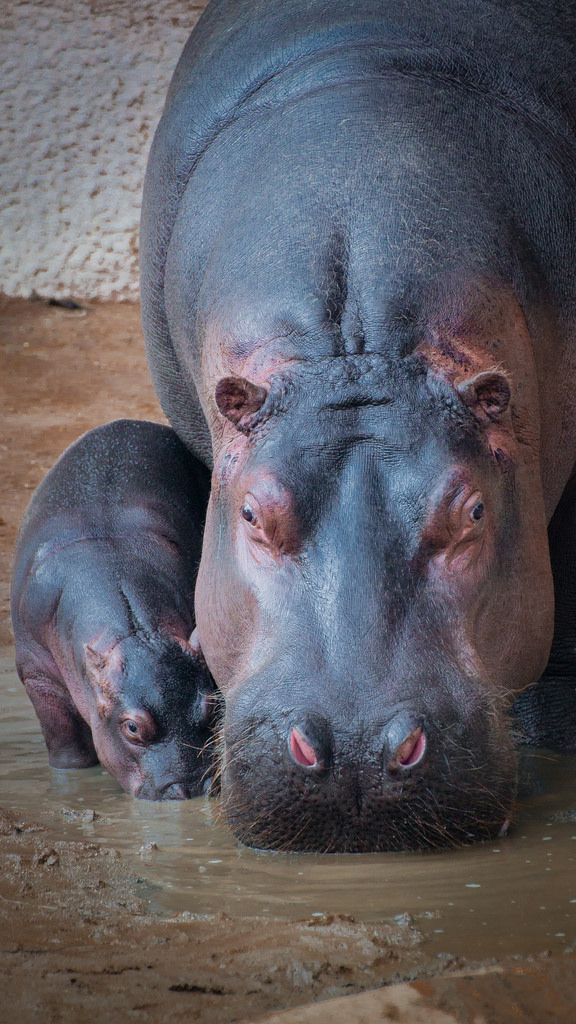

In [14]:
Image.open(img_path)

In [15]:
img = cv2.imread(img_path)
img

array([[[101, 103, 113],
        [ 96,  98, 108],
        [101, 103, 113],
        ...,
        [ 50,  45,  42],
        [ 48,  43,  40],
        [ 29,  24,  21]],

       [[105, 106, 116],
        [104, 106, 116],
        [110, 112, 122],
        ...,
        [ 48,  41,  38],
        [ 52,  45,  42],
        [ 49,  42,  39]],

       [[ 97,  98, 108],
        [ 98,  99, 109],
        [107, 108, 118],
        ...,
        [ 55,  48,  45],
        [ 48,  39,  36],
        [ 46,  37,  34]],

       ...,

       [[ 51,  64,  80],
        [ 49,  62,  78],
        [ 48,  61,  75],
        ...,
        [ 46,  60,  78],
        [ 46,  62,  79],
        [ 46,  62,  79]],

       [[ 50,  62,  74],
        [ 49,  60,  74],
        [ 49,  60,  74],
        ...,
        [ 44,  58,  76],
        [ 45,  59,  77],
        [ 45,  59,  77]],

       [[ 54,  63,  76],
        [ 52,  64,  76],
        [ 52,  64,  76],
        ...,
        [ 43,  57,  75],
        [ 44,  59,  75],
        [ 43,  58,  74]]

In [16]:
# Shape of each image
img.shape

(1024, 576, 3)

In [17]:
# Extracting label columns
label_cols = list(set(train.columns) - set(['Image_id']))
label_cols.sort()

In [18]:
label_cols

['y']

In [19]:
train.iloc[0][2:].index

Index([], dtype='object')

In [20]:
# Extracting labels corresponding to image at the zeroth index of the training dataset.# Extrac 
labels = train.iloc[0][2:].index[train.iloc[0][2:] == 1]

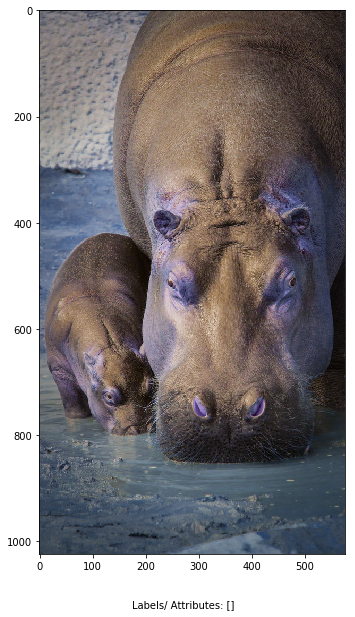

In [21]:
txt = 'Labels/ Attributes: ' + str(labels.values)
ax = plt.figure(figsize=(10, 10))
ax.text(.5, .05, txt, ha='center')
plt.imshow(img)

In [22]:
from tqdm import tqdm
def read_img(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (128, 128))
    return img

In [23]:
train_img = []
for img_path in tqdm(train.Image_id.values):
    train_img.append(read_img(TRAIN_PATH + img_path))

100%|████████████████████████████████████████████████████████████████████████████| 13000/13000 [10:39<00:00, 20.33it/s]


In [24]:
# Convert the image data into an array. # Conver 
# Since the range of color(RGB) is in the range of (0-255).
# Hence by dividing each image by 255, we convert the range to (0.0 - 1.0)
X_train = np.array(train_img, np.float32) / 255.

In [25]:
import gc
del train_img
gc.collect()

85

In [26]:
mean_img = X_train.mean(axis=0)

In [27]:
std_dev = X_train.std(axis = 0)

In [28]:
gc.collect()

0

In [29]:
X_norm_minus = (X_train - mean_img)

In [30]:
X_norm = X_norm_minus/std_dev

In [31]:
X_norm.shape

(13000, 128, 128, 3)

In [32]:
del X_train

In [33]:
gc.collect()

0

In [34]:
y = train[label_cols].values

In [ ]:
y

In [36]:
from sklearn.model_selection import train_test_split
Xtrain, Xvalid, ytrain, yvalid = train_test_split(X_norm, y, test_size=0.20, random_state=47)
del X_norm
gc.collect()

0

In [37]:
from keras.models  import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint

E:\Softwares\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [38]:
model = Sequential()
model.add(BatchNormalization(input_shape=Xtrain.shape[1:]))
model.add(Conv2D(32, kernel_size=(3, 3), activation= 'relu'))

model.add(Conv2D(64, kernel_size=(3, 3), activation= 'relu', padding='same'))
model.add(Conv2D(64, kernel_size=(3, 3), activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation= 'relu', padding='same'))
model.add(Conv2D(128, kernel_size=(3, 3), activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [39]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 128, 128, 3)       12        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 126, 126, 64)      18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 124, 124, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 62, 62, 128)       73856     
__________

In [40]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
early_stops = EarlyStopping(patience=3, monitor='val_acc')
checkpointer = ModelCheckpoint(filepath='weights.best.eda.hdf5', verbose=1, save_best_only=True)

In [ ]:
model.fit(Xtrain, ytrain, validation_data=(Xvalid, yvalid), epochs=20, batch_size=50, callbacks=[checkpointer], verbose=1)

Train on 10400 samples, validate on 2600 samples
Epoch 1/20
 1050/10400 [==>...........................] - ETA: 1:33:58 - loss: -2.4649 - acc: 0.040 - ETA: 1:22:16 - loss: -80.7849 - acc: 0.07 - ETA: 1:19:14 - loss: -110.1864 - acc: 0.073 - ETA: 1:17:25 - loss: -127.7567 - acc: 0.075 - ETA: 1:15:59 - loss: -127.5857 - acc: 0.088 - ETA: 1:14:49 - loss: -135.9742 - acc: 0.083 - ETA: 1:14:02 - loss: -142.8315 - acc: 0.074 - ETA: 1:13:22 - loss: -144.8657 - acc: 0.077 - ETA: 1:12:44 - loss: -148.1838 - acc: 0.077 - ETA: 1:12:43 - loss: -151.4759 - acc: 0.078 - ETA: 1:12:23 - loss: -155.0971 - acc: 0.078 - ETA: 1:12:04 - loss: -156.3876 - acc: 0.076 - ETA: 1:11:48 - loss: -158.8041 - acc: 0.075 - ETA: 1:11:27 - loss: -159.1444 - acc: 0.077 - ETA: 1:11:08 - loss: -162.0964 - acc: 0.073 - ETA: 1:10:53 - loss: -162.6070 - acc: 0.071 - ETA: 1:10:25 - loss: -162.5698 - acc: 0.075 - ETA: 1:09:57 - loss: -164.1664 - acc: 0.074 - ETA: 1:09:29 - loss: -163.3462 - acc: 0.074 - ETA: 1:09:11 - loss: -1

In [ ]:
train_pred = model.predict(Xtrain).round()

In [ ]:
f1_score(ytrain, train_pred, average='samples')

In [ ]:
valid_pred = model.predict(Xvalid).round()

In [ ]:
f1_score(yvalid, valid_pred, average='samples')

In [ ]:
gc.collect()

In [ ]:
from sklearn.metrics import f1_score
test_img = []
for img_path in tqdm(test.Image_id.values):
    test_img.append(read_img(TEST_PATH + img_path))

In [ ]:
X_test = np.array(test_img, np.float32) / 255.

In [ ]:
del test_img
gc.collect()

In [ ]:
mean_img = X_test.mean(axis=0)
std_dev = X_test.std(axis = 0)
X_norm_test = (X_test - mean_img)/ std_dev

In [ ]:
model.load_weights('weights.best.eda.hdf5')

In [ ]:
pred_test = model.predict(X_norm_test)
pred_test = pred_test.astype(np.int)

In [ ]:
subm = pd.DataFrame()
subm['Image_id'] = test.Image_id
label_df = pd.DataFrame(data=pred_test, columns=label_cols)
subm = pd.concat([subm, label_df], axis=1)

In [ ]:
subm.to_csv('submit.csv', index=False)